In [4]:
#Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Owner\OneDrive\Documents\Projects\Python Movie Industry\dataset\movies.csv')

In [5]:
#Peeking at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [6]:
#Seeking for missing data

for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, perc_missing))

budget-0.0%
company-0.0%
country-0.0%
director-0.0%
genre-0.0%
gross-0.0%
name-0.0%
rating-0.0%
released-0.0%
runtime-0.0%
score-0.0%
star-0.0%
votes-0.0%
writer-0.0%
year-0.0%


In [7]:
#Investigating data type

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [8]:
#Changing data type for budget and gross columns to remove excess decimals

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [9]:
#Create proper release year column

df['proper_release_year'] = df['released'].astype(str).str[:4]

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,proper_release_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [10]:
#Organizing data by top grossing film descending

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,proper_release_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [11]:
#Drop exisiting duplicates from the company column

df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

In [ ]:
#Checking two hypothosis, "does a large budget correlate with high profit?" and "does the 
#production company correlate with higher profits?"

<function matplotlib.pyplot.show(close=None, block=None)>

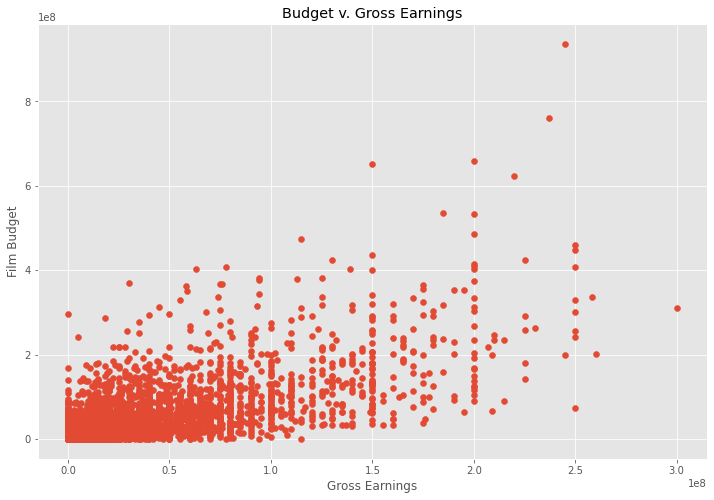

In [19]:
#Building scatter plot with budget v. gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget v. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel ('Film Budget')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

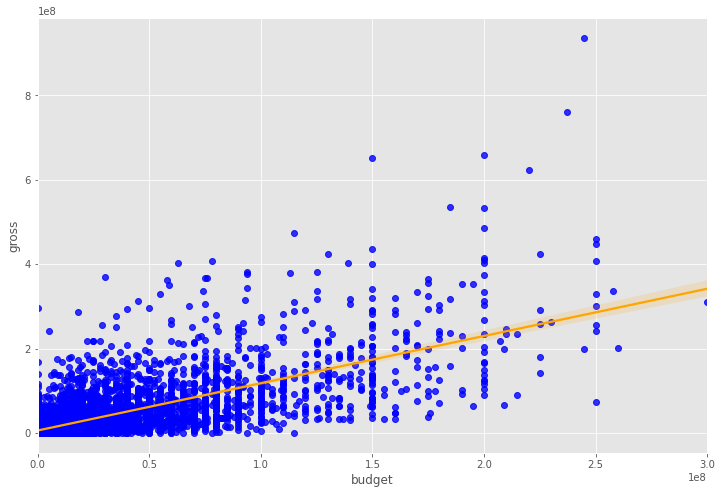

In [23]:
#Plot budget v. gross regression using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "orange"})

In [27]:
#Pearson, kendall, and spearman correlations

df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [28]:
df.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [29]:
df.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


In [ ]:
#Discovered high correlation between budget and gross in all 3 methods

<function matplotlib.pyplot.show(close=None, block=None)>

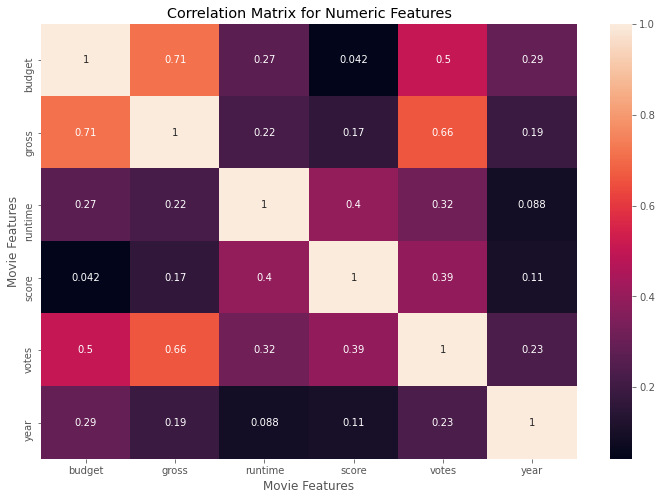

In [32]:
#Visualizing correlations

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel ('Movie Features')

plt.show

In [12]:
#Creating numeric interpretation

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

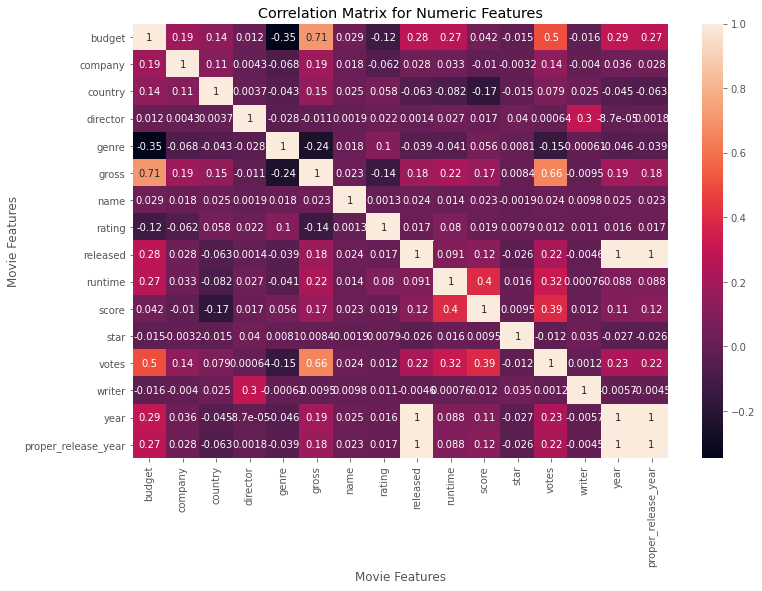

In [13]:
##Visualizing correlations with altered datatype

correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel ('Movie Features')

plt.show()

In [18]:
#Unstacking the data and pairing correlations together categorically

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

budget               budget                 1.000000
                     company                0.187205
                     country                0.137635
                     director               0.011602
                     genre                 -0.346794
                                              ...   
proper_release_year  star                  -0.026052
                     votes                  0.220797
                     writer                -0.004546
                     year                   0.996229
                     proper_release_year    1.000000
Length: 256, dtype: float64

In [19]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre                budget                -0.346794
budget               genre                 -0.346794
gross                genre                 -0.242676
genre                gross                 -0.242676
score                country               -0.174414
                                              ...   
director             director               1.000000
country              country                1.000000
company              company                1.000000
year                 year                   1.000000
proper_release_year  proper_release_year    1.000000
Length: 256, dtype: float64

In [20]:
#Only looking at more than 50% positive correlations

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes                budget                 0.503924
budget               votes                  0.503924
votes                gross                  0.662457
gross                votes                  0.662457
                     budget                 0.712196
budget               gross                  0.712196
released             year                   0.996187
year                 released               0.996187
proper_release_year  year                   0.996229
year                 proper_release_year    0.996229
proper_release_year  released               0.999389
released             proper_release_year    0.999389
budget               budget                 1.000000
writer               writer                 1.000000
votes                votes                  1.000000
star                 star                   1.000000
score                score                  1.000000
runtime              runtime                1.000000
released             released               1.

In [ ]:
#Based on the data our original hypothosis was partially corrct, with a larger budget absolutely correlating with higher 
#gross, however the votes each film recieved also had a positive impact whereas company did not.